# Retry analysis on 2020-03-04 Stress Test

In [1]:
import json
import pandas as pd
import numpy as np
import os
import plotly.express as px

## a) parse log file

In [2]:
def read_data(files, path):
    count_block, count_retry, count_retry_1, count_retry_2, count_retry_3 = 0,0,0,0,0
    retry_data = []
    for file in files:
        if "zerolog" in file:
            with open(path + file, errors='ignore') as f:
                for line in f.readlines():
                    if "RetryCount" in line:
                        json_line = json.loads(line)
                        retry_data.append(json_line)
                        count_retry += 1
                        if json_line["RetryCount"] == 1:
                            count_retry_1 += 1
                        if json_line["RetryCount"] == 2:
                            count_retry_2 += 1
                        if json_line["RetryCount"] == 3:
                            count_retry_3 += 1
                    if "HOORAY" in line:
                        count_block += 1
    print("total retry messages: " + str(count_retry))
    print("total 1st retry message: " + str(count_retry_1))
    print("total 2nd retry message: " + str(count_retry_2))
    print("total 3rd retry message: " + str(count_retry_3))
    print("total successful messages: " + str(count_block*3))
    print("total messages: " + str(count_block*3+count_retry))
    retry_percentage = count_retry / (count_block*3+count_retry)
    print("retry percentage:  " + str(retry_percentage))
    return retry_data

In [3]:
log_dir = "../../logs/node_logs/stress_test_03_04/s0-leader/"
files = os.listdir(log_dir)
retry_data = read_data(files, log_dir)

total retry messages: 109
total 1st retry message: 108
total 2nd retry message: 1
total 3rd retry message: 0
total successful messages: 3204
total messages: 3313
retry percentage:  0.03290069423483248


In [4]:
retry_df = pd.DataFrame(retry_data) 
stat = retry_df.groupby(["MsgType", "RetryCount"])["level"].count().reset_index(name="count")
stat["label"] = stat['MsgType'].str.cat(stat['RetryCount'].astype(str),sep="-")

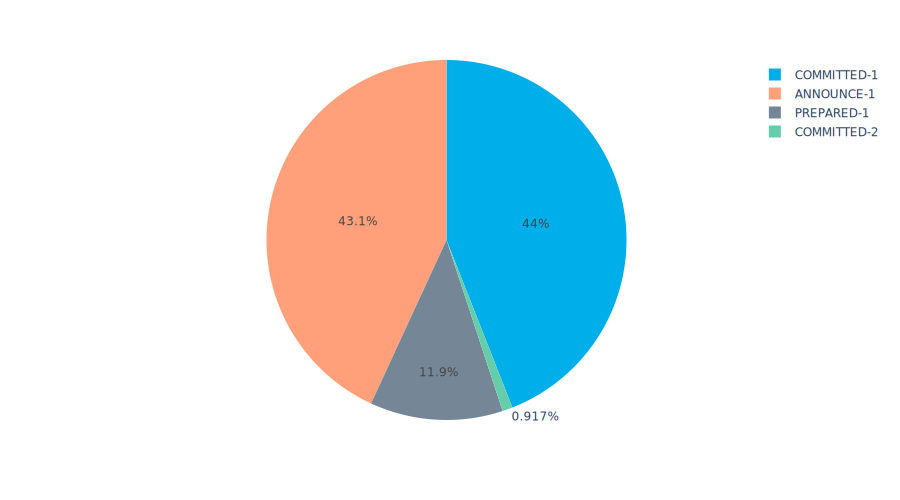

In [5]:
colors = ["#00AEE9", "#FFA07A", "#758796", "#66CDAA"]
fig = px.pie(stat, values='count', names='label', color_discrete_sequence=colors)
fig.show(renderer="svg",width=900, height=500)

In [6]:
stat

,MsgType,RetryCount,count,label
0,ANNOUNCE,1,47,ANNOUNCE-1
1,COMMITTED,1,48,COMMITTED-1
2,COMMITTED,2,1,COMMITTED-2
3,PREPARED,1,13,PREPARED-1
